# Churn Prediciton with Logistic Regression

* Load data & packages for model building 
* preprocessing and missing value imputaion
* selecting features and building the model

In [38]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [39]:
data=pd.read_csv("churn_prediction.csv")
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [40]:
data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

The result of function shows us there quite few missing values in column gender,dependents,city, days_since_last_transaction.Let us go through each one them and find appropriate missing value imputation.


In [41]:
data["gender"].value_counts()

Male      16548
Female    11309
Name: gender, dtype: int64

<b>Gender</b>

There is good mix of values and argubaly We cannot fill this with any one of the value.So we assign -1 for alll the missing values.

In [42]:
dict_gender={"Male" : 1, "Female": 0}
data.replace({"gender":dict_gender},inplace=True)

data["gender"]=data["gender"].fillna(-1)

<b>Dependents,city,occupation</b>

In [43]:
data["dependents"].value_counts()

0.0     21435
2.0      2150
1.0      1395
3.0       701
4.0       179
5.0        41
6.0         8
7.0         3
9.0         1
52.0        1
36.0        1
50.0        1
8.0         1
25.0        1
32.0        1
Name: dependents, dtype: int64

In [44]:
data["occupation"].value_counts()

self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

In [45]:
data["city"].value_counts()

1020.0    3479
1096.0    2016
409.0     1334
146.0     1291
834.0     1138
          ... 
748.0        1
1099.0       1
108.0        1
655.0        1
723.0        1
Name: city, Length: 1604, dtype: int64

we will fill this missing values with mode as this is sort of ordinal varible

In [46]:
data["city"]=data["city"].fillna(1020)

In [47]:
data["occupation"]=data["occupation"].fillna("self_employed")

In [48]:
data["dependents"]=data["dependents"].fillna(0)

<b>Days since last transaction</b>

A fair assumption can be made on this columns as it is number of transaction made since one year, we can substitute the missing value greater than one year say 999 , which represents customer is inactive

In [49]:
data["days_since_last_transaction"]=data["days_since_last_transaction"].fillna(999)

# Preprocessing

since we are applying the linear models we need to scale them up in right manner.

In [50]:
data=pd.concat([data,pd.get_dummies(data['occupation'],prefix = str('occupation'),prefix_sep='_')],axis = 1)
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,1,3135,66,1.0,0.0,self_employed,187.0,2,755,224.0,...,0.20,0.20,1458.71,1458.71,0,0,0,0,1,0
1,2,310,35,1.0,0.0,self_employed,1020.0,2,3214,60.0,...,5486.27,100.56,6496.78,8787.61,0,0,0,0,1,0
2,4,2356,31,1.0,0.0,salaried,146.0,2,41,999.0,...,6046.73,259.23,5006.28,5070.14,0,0,0,1,0,0
3,5,478,90,-1.0,0.0,self_employed,1020.0,2,582,147.0,...,0.47,2143.33,2291.91,1669.79,1,0,0,0,1,0
4,6,2531,42,1.0,2.0,self_employed,1494.0,3,388,58.0,...,588.62,1538.06,1157.15,1677.16,1,0,0,0,1,0


In [51]:
num_cols = ['current_balance','previous_month_end_balance', 'average_monthly_balance_prevQ2', 'average_monthly_balance_prevQ',
            'current_month_credit','previous_month_credit', 'current_month_debit', 
            'previous_month_debit','current_month_balance', 'previous_month_balance']

for i in num_cols:
    data[i] = np.log(data[i] + 17000)    

In [52]:
from sklearn.preprocessing import StandardScaler

std=StandardScaler()
scaled=std.fit_transform(data[num_cols])
scaled=pd.DataFrame(scaled,columns=num_cols)


In [53]:
df_copy=data.copy()
data=data.drop(columns=num_cols,axis=1)

In [54]:
data = data.merge(scaled,left_index=True,right_index=True,how = "left")
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,current_balance,previous_month_end_balance,average_monthly_balance_prevQ2,average_monthly_balance_prevQ,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance
0,1,3135,66,1.0,0.0,self_employed,187.0,2,755,224.0,...,-0.613738,-0.632367,-0.630646,-0.697612,-0.313931,-0.324487,-0.368251,-0.377390,-0.653455,-0.666207
1,2,310,35,1.0,0.0,self_employed,1020.0,2,3214,60.0,...,0.011267,0.446458,0.949414,0.317595,-0.313852,-0.324410,0.640986,-0.355677,0.149440,0.455680
2,4,2356,31,1.0,0.0,salaried,146.0,2,41,999.0,...,-0.209651,0.057975,-0.388637,-0.108263,-0.313841,-0.324400,0.729825,-0.321607,-0.068597,-0.066642
3,5,478,90,-1.0,0.0,self_employed,1020.0,2,582,147.0,...,-0.470836,-0.488530,-0.712855,-0.582976,-0.313872,-0.324429,-0.368193,0.060593,-0.506570,-0.628056
4,6,2531,42,1.0,2.0,self_employed,1494.0,3,388,58.0,...,-0.708214,-0.642441,-0.554058,-0.663399,-0.313902,-0.175104,-0.245463,-0.057927,-0.708257,-0.626732


In [55]:
y_all = data.churn
data = data.drop(['churn','customer_id','occupation'],axis = 1)

In [56]:
baseline_cols = ['current_month_debit', 'previous_month_debit','current_balance','previous_month_end_balance','vintage'
                 ,'occupation_retired', 'occupation_salaried','occupation_self_employed', 'occupation_student']

In [57]:
df_baseline = data[baseline_cols]

In [58]:
from sklearn.model_selection import train_test_split
# Splitting the data into Train and Validation set
xtrain, xtest, ytrain, ytest = train_test_split(df_baseline,y_all,test_size=1/3, random_state=11, stratify = y_all)

In [59]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(xtrain,ytrain)
pred = model.predict_proba(xtest)[:,1]

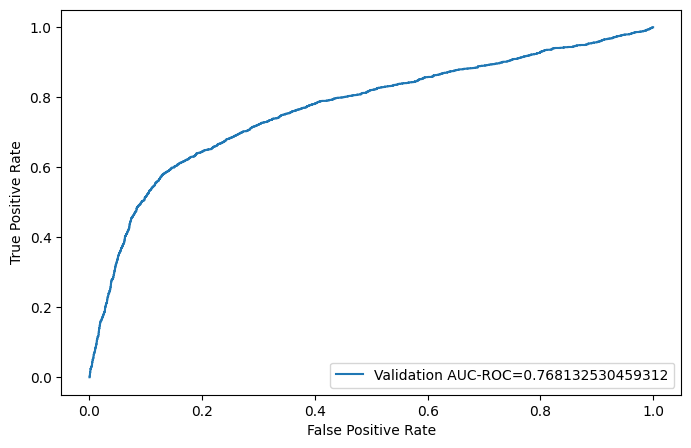

In [60]:
from sklearn.metrics import roc_curve,recall_score,precision_score,roc_auc_score

fpr, tpr, _ = roc_curve(ytest,pred) 
auc = roc_auc_score(ytest, pred) 
plt.figure(figsize=(8,5)) 
plt.plot(fpr,tpr,label="Validation AUC-ROC="+str(auc))

plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

In [61]:
# Confusion Matrix
pred_val = model.predict(xtest)

In [62]:
# Recall Score
recall_score(ytest,pred_val)

0.11580148317170565

In [63]:
from sklearn.model_selection import StratifiedKFold

def cv_score(ml_model,rstate=15,thres=0.5,cols=data.columns):
    i=1
    cv_scores=[]
    df1=data.copy()
    df1=data[cols]
    
    kf=StratifiedKFold(n_splits=5,random_state=rstate,shuffle=True)
    for df_index,test_index in kf.split(df1,y_all):
        print('\n{} of kfold {}'.format(i,kf.n_splits))
        xtr,xvl = df1.loc[df_index],df1.loc[test_index]
        ytr,yvl = y_all.loc[df_index],y_all.loc[test_index]
        
        model = ml_model
        model.fit(xtr, ytr)
        pred_probs = model.predict_proba(xvl)
        pp = []
        
        for j in pred_probs[:,1]:
            if j>thres:
                pp.append(1)
            else:
                pp.append(0)
         
        pred_val=pp
        roc_score = roc_auc_score(yvl,pred_probs[:,1])
        recall = recall_score(yvl,pred_val)
        precision = precision_score(yvl,pred_val)
        msg = ""
        msg += "ROC AUC Score: {}, Recall Score: {:.4f}, Precision Score: {:.4f} ".format(roc_score, recall,precision)
        print("{}".format(msg))
         
         # Save scores
        cv_scores.append(roc_score)
        i+=1
    return cv_scores        

In [64]:
baseline_scores = cv_score(LogisticRegression(), cols = baseline_cols)


1 of kfold 5
ROC AUC Score: 0.7582201212619464, Recall Score: 0.1226, Precision Score: 0.6293 

2 of kfold 5
ROC AUC Score: 0.7717504881307163, Recall Score: 0.1274, Precision Score: 0.6233 

3 of kfold 5
ROC AUC Score: 0.7429478123725446, Recall Score: 0.1245, Precision Score: 0.6550 

4 of kfold 5
ROC AUC Score: 0.770264580893865, Recall Score: 0.1112, Precision Score: 0.6257 

5 of kfold 5
ROC AUC Score: 0.7701603552962228, Recall Score: 0.1274, Precision Score: 0.6381 


In [65]:
all_feat_scores = cv_score(LogisticRegression())


1 of kfold 5
ROC AUC Score: 0.7591417120542595, Recall Score: 0.1644, Precision Score: 0.6455 

2 of kfold 5
ROC AUC Score: 0.7597872777720686, Recall Score: 0.1188, Precision Score: 0.5531 

3 of kfold 5
ROC AUC Score: 0.7238675385161893, Recall Score: 0.1103, Precision Score: 0.5524 

4 of kfold 5
ROC AUC Score: 0.7422893615061771, Recall Score: 0.1312, Precision Score: 0.6699 

5 of kfold 5
ROC AUC Score: 0.7455209717526018, Recall Score: 0.1207, Precision Score: 0.5546 


In [67]:
from sklearn.feature_selection import RFE

# Create the RFE object and rank each feature
model = LogisticRegression()
rfe = RFE(estimator=model, n_features_to_select=1, step=1)
rfe.fit(data, y_all)

RFE(estimator=LogisticRegression(), n_features_to_select=1)

In [69]:
ranking_df = pd.DataFrame()
ranking_df['Feature_name'] = data.columns
ranking_df['Rank'] = rfe.ranking_

In [70]:
ranked = ranking_df.sort_values(by=['Rank'])

In [71]:
ranked

,Feature_name,Rank
13,current_balance,1
16,average_monthly_balance_prevQ,2
8,occupation_company,3
15,average_monthly_balance_prevQ2,4
21,current_month_balance,5
22,previous_month_balance,6
19,current_month_debit,7
9,occupation_retired,8
5,customer_nw_category,9
20,previous_month_debit,10


In [72]:
rfe_top_10_scores = cv_score(LogisticRegression(), cols = ranked['Feature_name'][:10].values)


1 of kfold 5
ROC AUC Score: 0.7836047682663652, Recall Score: 0.2101, Precision Score: 0.7016 

2 of kfold 5
ROC AUC Score: 0.7978429760559038, Recall Score: 0.2148, Precision Score: 0.7129 

3 of kfold 5
ROC AUC Score: 0.7979744053179312, Recall Score: 0.2234, Precision Score: 0.7460 

4 of kfold 5
ROC AUC Score: 0.805237305445551, Recall Score: 0.2139, Precision Score: 0.7500 

5 of kfold 5
ROC AUC Score: 0.8029809343218387, Recall Score: 0.2414, Precision Score: 0.7362 


In [73]:
cv_score(LogisticRegression(), cols = ranked['Feature_name'][:10].values, thres=0.14)


1 of kfold 5
ROC AUC Score: 0.7836047682663652, Recall Score: 0.8051, Precision Score: 0.2923 

2 of kfold 5
ROC AUC Score: 0.7978429760559038, Recall Score: 0.8156, Precision Score: 0.2929 

3 of kfold 5
ROC AUC Score: 0.7979744053179312, Recall Score: 0.8241, Precision Score: 0.2862 

4 of kfold 5
ROC AUC Score: 0.805237305445551, Recall Score: 0.8203, Precision Score: 0.3044 

5 of kfold 5
ROC AUC Score: 0.8029809343218387, Recall Score: 0.8289, Precision Score: 0.2991 


[0.7836047682663652,
 0.7978429760559038,
 0.7979744053179312,
 0.805237305445551,
 0.8029809343218387]

In [74]:
results_df = pd.DataFrame({'baseline':baseline_scores, 'all_feats': all_feat_scores, 'rfe_top_10': rfe_top_10_scores})

<AxesSubplot: >

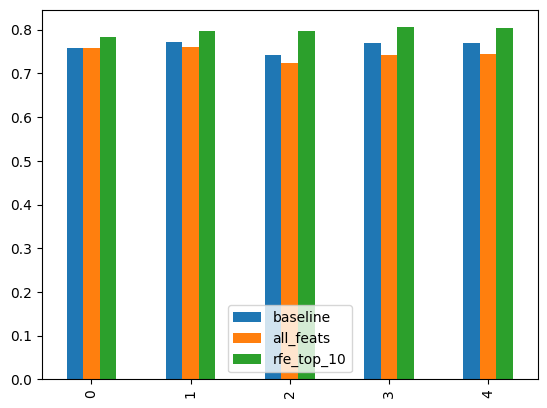

In [75]:
results_df.plot(y=["baseline", "all_feats", "rfe_top_10"], kind="bar")